In [ ]:
# This is the moment where you really learn.

# Take the model we created as a basis and try to improve it.

# One of the biggest changes will be observed when you include the 'Model' feature we dropped in the beginning.

# Here are some other suggestions:

# -> Perform feature selection

# -> Create a regression where 'Price' is not transformed

# -> Deal with the outliers in a different way

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import missingno as msno

In [3]:
# zaimportowanie danych
df=pd.read_csv('1.04.+Real-life+example.csv')

# Let's explore the top 5 rows of the df
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
#deal with null
df_no_null=df.dropna(axis=0)

In [7]:
df_no_null.shape

(4025, 9)

C:\Users\Aldona\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

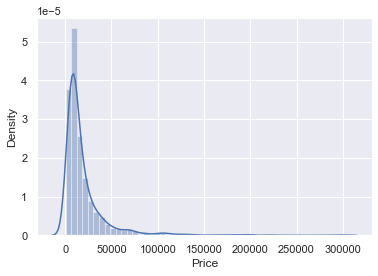

In [8]:
sns.distplot(df_no_null['Price'])

<AxesSubplot:xlabel='Price'>

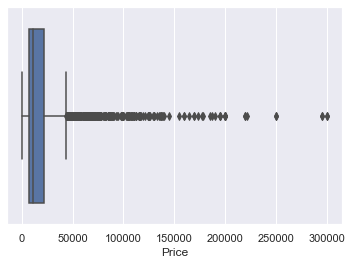

In [11]:
#Deal with objects
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
 8   Model         4025 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 314.5+ KB


In [20]:
df_no_null['Model'].value_counts()


E-Class    188
Vito       156
A6         156
Kangoo     136
Camry      127
          ... 
120          1
R 320        1
11           1
Pointer      1
GLK 300      1
Name: Model, Length: 306, dtype: int64

In [23]:
df_no_null['Brand_cat']=df_no_null['Brand'].factorize()[0]
df_no_null['Brand_cat'].value_counts()

<ipython-input-23-4bc59d844bc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null['Brand_cat']=df_no_null['Brand'].factorize()[0]


5    880
1    823
0    640
3    510
4    445
2    420
6    307
Name: Brand_cat, dtype: int64

In [25]:
df_no_null['Engine Type_cat']=df_no_null['Engine Type'].factorize()[0]
df_no_null['Engine Type_cat'].value_counts()

<ipython-input-25-b5c087a3838d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null['Engine Type_cat']=df_no_null['Engine Type'].factorize()[0]


1    1861
0    1468
2     590
3     106
Name: Engine Type_cat, dtype: int64

In [26]:

df_no_null['Registration_cat']=df_no_null['Registration'].factorize()[0]
df_no_null['Registration_cat'].value_counts()

<ipython-input-26-6d6c3282e2a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null['Registration_cat']=df_no_null['Registration'].factorize()[0]


0    3654
1     371
Name: Registration_cat, dtype: int64

In [27]:

df_no_null['Model_cat']=df_no_null['Model'].factorize()[0]
df_no_null['Model_cat'].value_counts()

<ipython-input-27-d069fc17beab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null['Model_cat']=df_no_null['Model'].factorize()[0]


41     188
20     156
6      156
34     136
27     127
      ... 
288      1
286      1
284      1
278      1
304      1
Name: Model_cat, Length: 306, dtype: int64

<AxesSubplot:xlabel='Model_cat'>

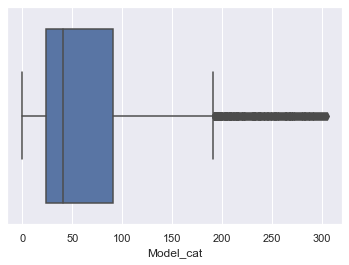

In [29]:
#-> Deal with the outliers in a different way
sns.boxplot(x=df_no_null['Model_cat'])

In [44]:
df_no_null['EngineV'].describe()

count    4025.000000
mean        2.764586
std         4.935941
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

In [75]:
def rule(x):
    if x > 8:
         return x/100
    else:
        return x
    

In [76]:
df_no_null['EngineV_cat'] = df_no_null.apply(lambda df_no_null: rule(df_no_null['EngineV']), axis =  1)

<ipython-input-76-167609e37b66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null['EngineV_cat'] = df_no_null.apply(lambda df_no_null: rule(df_no_null['EngineV']), axis =  1)


In [77]:
df_no_null['EngineV_cat'].describe()

count    4025.000000
mean        2.459118
std         0.985409
min         0.090000
25%         1.800000
50%         2.200000
75%         3.000000
max         7.200000
Name: EngineV_cat, dtype: float64

In [78]:
df_no_null['EngineV_cat'].unique

<bound method Series.unique of 0       2.0
1       2.9
2       5.0
3       4.2
4       2.0
       ... 
4339    1.6
4340    3.0
4341    3.5
4342    2.0
4344    2.0
Name: EngineV_cat, Length: 4025, dtype: float64>

<AxesSubplot:xlabel='EngineV_cat'>

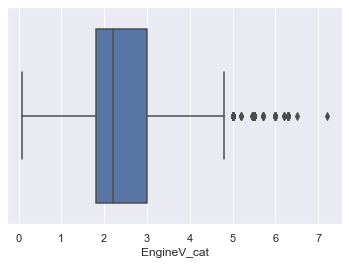

In [85]:
sns.boxplot(x=df_no_null['EngineV_cat'])

In [80]:
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             4025 non-null   object 
 1   Price             4025 non-null   float64
 2   Body              4025 non-null   object 
 3   Mileage           4025 non-null   int64  
 4   EngineV           4025 non-null   float64
 5   Engine Type       4025 non-null   object 
 6   Registration      4025 non-null   object 
 7   Year              4025 non-null   int64  
 8   Model             4025 non-null   object 
 9   Brand_cat         4025 non-null   int64  
 10  Body_cat          4025 non-null   int64  
 11  Engine Type_cat   4025 non-null   int64  
 12  Registration_cat  4025 non-null   int64  
 13  Model_cat         4025 non-null   int64  
 14  EngineV_cat       4025 non-null   float64
dtypes: float64(3), int64(7), object(5)
memory usage: 663.1+ KB


In [83]:
from scipy import stats

z = np.abs(stats.zscore(df_no_null[['Price', 'Mileage', 'Year', 'Brand_cat', 'Body_cat','Engine Type_cat', 'Registration_cat', 'Model_cat', 'EngineV_cat']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Ponizej sa punkty odstajace - nr indeksow i odpowiadające im indeksy kolumn w drugim wektorze')
print("\n")
print(np.where(z > 3))

[[0.5947619  1.09717342 2.29726223 ... 0.31864175 1.06020105 0.46597384]
 [0.45142065 2.54810497 1.10229844 ... 0.31864175 1.04381781 0.44746585]
 [0.24221991 1.88067646 0.50481654 ... 0.31864175 1.02743457 2.57882514]
 ...
 [0.50565788 1.57254065 1.10229844 ... 0.31864175 1.74133264 1.05642565]
 [0.44754656 0.29432462 3.19348508 ... 0.31864175 0.19188944 0.46597384]
 [0.23447173 0.38277677 0.98888821 ... 0.31864175 0.2996077  0.46597384]]


*******************************************************************************


Ponizej sa punkty odstajace - nr indeksow i odpowiadające im indeksy kolumn w drugim wektorze


(array([   5,    5,    9,   16,   18,   26,   38,   51,   56,   57,   63,
         64,   68,   70,   72,   86,   96,   97,  110,  111,  118,  128,
        146,  156,  160,  169,  171,  173,  175,  187,  189,  193,  196,
        201,  209,  213,  216,  240,  245,  249,  257,  265,  267,  302,
        303,  306,  321,  321,  322,  325,  327,  334,  337,  364,  365,
        37

In [88]:
df_outliers_removed = df_no_null[(z<3).all(axis=1)]
df_outliers_removed.shape

(3362, 15)

In [10]:
threshold = -3
print(np.where(z > -3))

(array([], dtype=int64),)


<AxesSubplot:xlabel='EngineV_cat'>

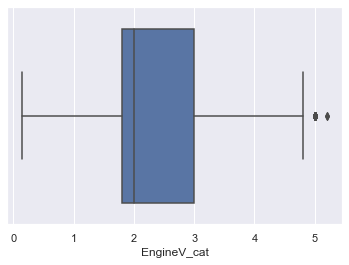

In [89]:
sns.boxplot(x=df_outliers_removed['EngineV_cat'])

In [90]:
df_2=df_outliers_removed[['Price', 'Mileage', 'Year', 'Brand_cat', 'Body_cat','Engine Type_cat', 'Registration_cat', 'Model_cat', 'EngineV_cat']]

C:\Users\Aldona\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

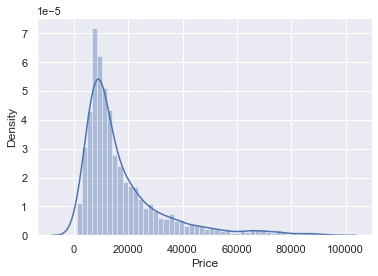

In [91]:
sns.distplot(df_2['Price'])

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_2[['Mileage','Year','Brand_cat', 'Body_cat','Engine Type_cat', 'Registration_cat', 'Model_cat', 'EngineV_cat']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

C:\Users\Aldona\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [95]:
vif

,VIF,features
0,3.974599,Mileage
1,22.055931,Year
2,3.878818,Brand_cat
3,2.031382,Body_cat
4,2.277517,Engine Type_cat
5,NaN,Registration_cat
6,2.326181,Model_cat
7,10.505523,EngineV_cat


In [98]:
data_no_multicollinearity = df_2.drop(['Year'],axis=1)
data_no_multicollinearity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3362 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             3362 non-null   float64
 1   Mileage           3362 non-null   int64  
 2   Brand_cat         3362 non-null   int64  
 3   Body_cat          3362 non-null   int64  
 4   Engine Type_cat   3362 non-null   int64  
 5   Registration_cat  3362 non-null   int64  
 6   Model_cat         3362 non-null   int64  
 7   EngineV_cat       3362 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 396.4 KB


In [102]:
x = data_no_multicollinearity.drop(['Price'],axis=1)
y = data_no_multicollinearity['Price']

In [103]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [104]:
reg.score(x,y)

0.5137297164884992

In [106]:
# The target(s) (dependent variable) is 'log price'
targets = data_no_multicollinearity['Price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_no_multicollinearity.drop(['Price'],axis=1)

In [108]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [110]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [111]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [112]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [113]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

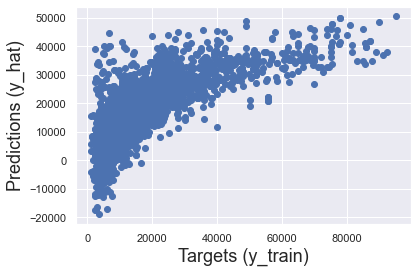

In [126]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same

plt.show()

C:\Users\Aldona\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

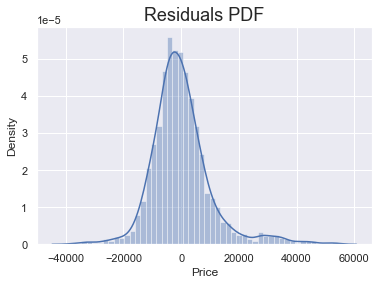

In [115]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

In [116]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.5226100584781878

In [117]:
# Obtain the bias (intercept) of the regression
reg.intercept_

17474.096377740458

In [118]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-8.97984099e+03, -3.46303241e+03,  5.24724431e+02,  5.56238949e+02,
       -4.54747351e-13,  5.09321772e+02,  5.29237652e+03])

In [119]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-8.979841e+03
1,Brand_cat,-3.463032e+03
2,Body_cat,5.247244e+02
3,Engine Type_cat,5.562389e+02
4,Registration_cat,-4.547474e-13
5,Model_cat,5.093218e+02
6,EngineV_cat,5.292377e+03


In [122]:
y_hat_test = reg.predict(x_test)

In [124]:
y_hat_test

array([ 1.84905586e+04,  2.87946896e+04,  2.99898992e+04,  2.35837046e+04,
        2.50617404e+04, -2.32511642e+03,  4.90638302e+03,  2.63397413e+04,
        1.71649799e+04,  1.25767864e+04,  2.79947009e+04,  1.52756687e+04,
        2.86802507e+04,  2.33970113e+04,  6.41202515e+03,  2.10612654e+03,
        1.58872463e+04,  1.74046472e+04, -5.06424641e+03,  1.00219343e+04,
        2.47203506e+04, -1.36986738e+04,  5.30794690e+03,  3.72648332e+03,
        1.70736933e+04,  1.10246470e+04,  1.29189243e+04,  6.17276083e+03,
       -5.21005242e+03,  8.47084174e+03, -6.39900428e+03,  7.01176497e+03,
        1.87556463e+04, -1.35638014e+04,  7.52831826e+03,  3.13144673e+04,
        2.86621735e+04,  1.14241353e+04,  1.02439610e+04,  1.65639803e+04,
        1.89160071e+03,  2.51760881e+04,  2.11969796e+04,  1.73979355e+04,
        2.35717372e+04,  3.49391551e+04,  2.96947425e+04,  3.39288000e+04,
        2.32872499e+04,  2.66587811e+04,  6.02414066e+03,  7.91804312e+03,
        3.44264993e+04,  

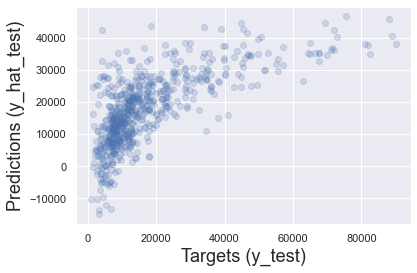

In [127]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)

plt.show()

In [131]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,18490.558611
1,28794.689557
2,29989.899235
3,23583.704595
4,25061.740446


In [132]:
df_pf['Target'] = np.exp(y_test)
df_pf

C:\Users\Aldona\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Prediction,Target
0,18490.558611,NaN
1,28794.689557,inf
2,29989.899235,NaN
3,23583.704595,NaN
4,25061.740446,NaN
...,...,...
668,22976.532179,NaN
669,35876.940793,NaN
670,32740.705626,NaN
671,20696.122939,NaN


In [133]:
# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0     9000.0
1    39999.0
2    51500.0
3    10500.0
4    11800.0
Name: Price, dtype: float64

In [135]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,18490.558611,9000.0
1,28794.689557,39999.0
2,29989.899235,51500.0
3,23583.704595,10500.0
4,25061.740446,11800.0
...,...,...
668,22976.532179,28800.0
669,35876.940793,43500.0
670,32740.705626,26900.0
671,20696.122939,12090.0


In [136]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [137]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,18490.558611,9000.0,-9490.558611,105.450651
1,28794.689557,39999.0,11204.310443,28.011476
2,29989.899235,51500.0,21510.100765,41.767186
3,23583.704595,10500.0,-13083.704595,124.606710
4,25061.740446,11800.0,-13261.740446,112.387631
...,...,...,...,...
668,22976.532179,28800.0,5823.467821,20.220374
669,35876.940793,43500.0,7623.059207,17.524274
670,32740.705626,26900.0,-5840.705626,21.712660
671,20696.122939,12090.0,-8606.122939,71.183813
